**1. Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os
import zipfile
import matplotlib.pyplot as plt
from google.colab import drive

**2. Extract Dataset from Google Drive**

In [2]:
# Import necessary libraries
import os
import zipfile
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths to dataset
zip_path = '/content/drive/MyDrive/Dataset/SkinDiseases.zip'
extract_path = '/content/skin_disease_dataset'

# Check if the dataset is already extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print('Dataset extracted successfully.')
else:
    print('Dataset already extracted. Skipping extraction.')

# Define paths to train and test directories
data_dir_train = os.path.join(extract_path, 'SkinDisease/train')
data_dir_test = os.path.join(extract_path, 'SkinDisease/test')

# Validate the paths
assert os.path.exists(data_dir_train), f"Train directory not found: {data_dir_train}"
assert os.path.exists(data_dir_test), f"Test directory not found: {data_dir_test}"
print('Train and Test directories are valid.')

Mounted at /content/drive
Extracting dataset...
Dataset extracted successfully.
Train and Test directories are valid.


In [3]:
import os

# Check if the dataset is already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print('Dataset extracted successfully.')
else:
    print('Dataset already extracted. Skipping extraction.')

Dataset already extracted. Skipping extraction.


**3. Data Preprocessing and Augmentation**

In [4]:
# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for training and validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 11128 images belonging to 22 classes.
Found 2770 images belonging to 22 classes.


**4. Build VGG16 Model**

In [5]:
# Define VGG16 Model
input_shape = (128, 128, 3)
input_tensor = Input(shape=input_shape, name="input_image")

# Use VGG16 as the base model
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model_vgg.trainable = False  # Freeze the layers
for layer in base_model_vgg.layers[:-4]:  # Fine-tune last 4 layers
    layer.trainable = False

# Add custom layers on top of VGG16
x_vgg = base_model_vgg.output
x_vgg = GlobalAveragePooling2D()(x_vgg)
x_vgg = Dense(512, activation='relu')(x_vgg)
output_vgg = Dense(train_generator.num_classes, activation='softmax')(x_vgg)

# Define the model
model_vgg = Model(inputs=input_tensor, outputs=output_vgg)

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**5. Callbacks for Training**

In [6]:
# Callbacks to reduce learning rate and stop early if overfitting occurs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=1e-5, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

**6. Train the Model**

In [7]:
# Train the model
history_vgg = model_vgg.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[reduce_lr]
)

# Save the trained model with the correct file extension
model_vgg.save('/content/drive/MyDrive/Final_VGG16_Individual.h5')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 150s 771ms/step - accuracy: 0.1959 - loss: 2.7278 - val_accuracy: 0.2567 - val_loss: 2.5188 - learning_rate: 0.0010
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 174s 673ms/step - accuracy: 0.2930 - loss: 2.3656 - val_accuracy: 0.2780 - val_loss: 2.4467 - learning_rate: 0.0010
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 120s 670ms/step - accuracy: 0.3291 - loss: 2.2461 - val_accuracy: 0.2751 - val_loss: 2.4539 - learning_rate: 0.0010
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 119s 661ms/step - accuracy: 0.3482 - loss: 2.1618 - val_accuracy: 0.2906 - val_loss: 2.4110 - learning_rate: 0.0010
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 118s 663ms/step - accuracy: 0.3662 - loss: 2.0951 - val_accuracy: 0.2733 - val_loss: 2.4173 - learning_rate: 0.0010
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 143s 661ms/step - accuracy: 0.3787 - loss: 2.0559 - val_accuracy: 0.2780 - val_loss: 2.4321 - learning_rate: 0.0010
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.3831 - 

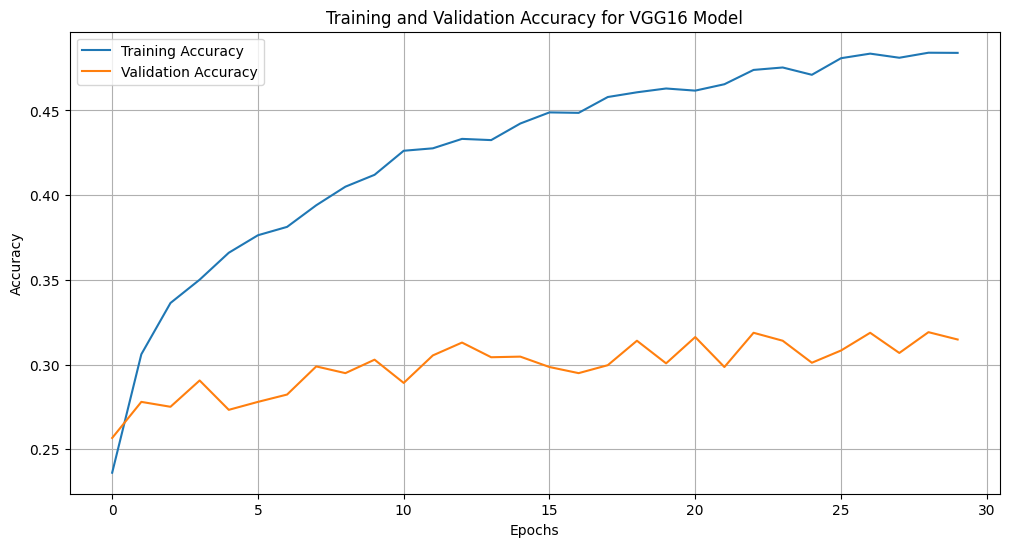

In [8]:
# Visualizing Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy for VGG16 Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Data Preprocessing for Test Set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistent evaluation
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_vgg.evaluate(test_generator)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


Found 1546 images belonging to 22 classes.
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 459ms/step - accuracy: 0.3304 - loss: 2.2613
Final Test Accuracy: 32.08%
